## [Bài tập] Trực quan hóa cơ bản dữ liệu GDP list

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
data = pd.read_csv("GDPlist.csv", encoding = "ISO-8859-1")
data

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644
...,...,...,...
120,Uzbekistan,Asia,45353
121,Venezuela,South America,315841
122,Vietnam,Asia,122722
123,Yemen,Africa,33675


## So sánh GDP các nước ở South America.

In [4]:
# lấy dữ liệu cần
data1 = data[(data.loc[:,'Continent'] == 'South America')]
data1

,Country,Continent,GDP (millions of US$)
4,Argentina,South America,447644
15,Brazil,South America,2492908
22,Chile,South America,248411
24,Colombia,South America,328422
34,Ecuador,South America,66381
86,Paraguay,South America,21236
87,Peru,South America,173502
119,Uruguay,South America,46872
121,Venezuela,South America,315841


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 4 to 121
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                9 non-null      object
 1   Continent              9 non-null      object
 2   GDP (millions of US$)  9 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 288.0+ bytes


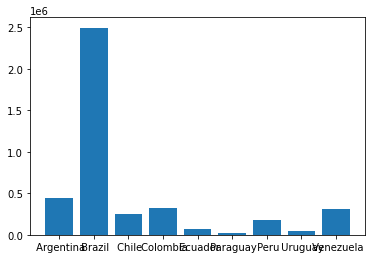

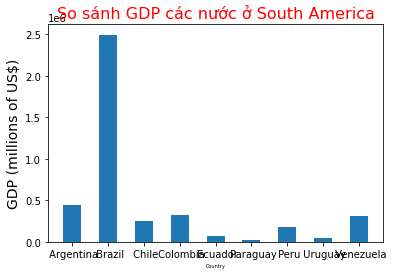

In [6]:
# Vẽ biểu đồ cột

plt.bar(data1.loc[:,'Country'], data1.loc[:,'GDP (millions of US$)'])
plt.show()
# Tinh chỉnh thuộc tính biểu đồ
# In [45]:

plt.bar(data1.loc[:,'Country'], data1.loc[:,'GDP (millions of US$)'], width = 0.5)

plt.title('So sánh GDP các nước ở South America', fontsize = 16, color = 'r')
plt.xlabel('Country', fontsize = 5)
plt.ylabel('GDP (millions of US$)', fontsize = 14)
plt.show()

## Biểu đồ để đánh giá tỉ lệ đóng góp GDP của các nước trên tổng số GDP của 5 nước Vietnam,  Indonesia, Cambodia, Thailand và Malaysia.

In [12]:
# lấy dữ liệu cần
data2 = data[(data.loc[:,'Continent'] == 'Asia')]
data3 = data[(data.loc[:,'Country'] == 'Vietnam')or(data.loc[:,'Country'] == 'Indonesia')or(data.loc[:,'Country'] == 'Cambodia')or(data.loc[:,'Country'] == 'Thailand')or(data.loc[:,'Country'] == 'Malaysia')]
data3           

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().